In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Country-data.csv')

In [3]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Data Exploration and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Lets set 'country' as index as it is an unique identifier of a row

In [6]:
data.set_index('country',inplace=True)

In [7]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

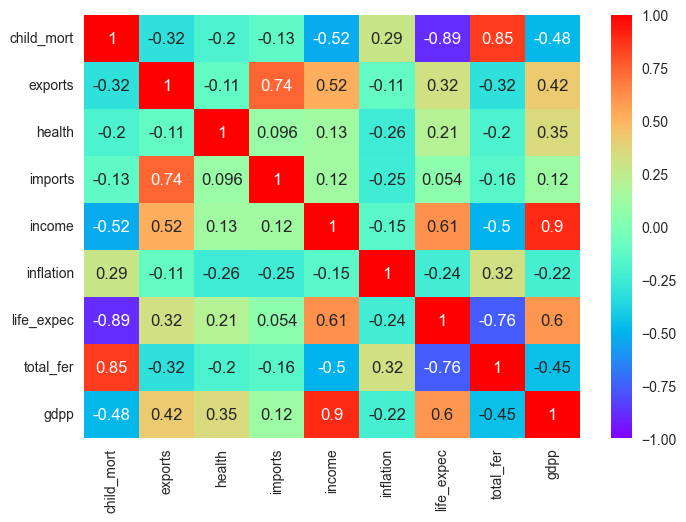

In [8]:
# Lets look at the correlation
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='rainbow')
plt.show()

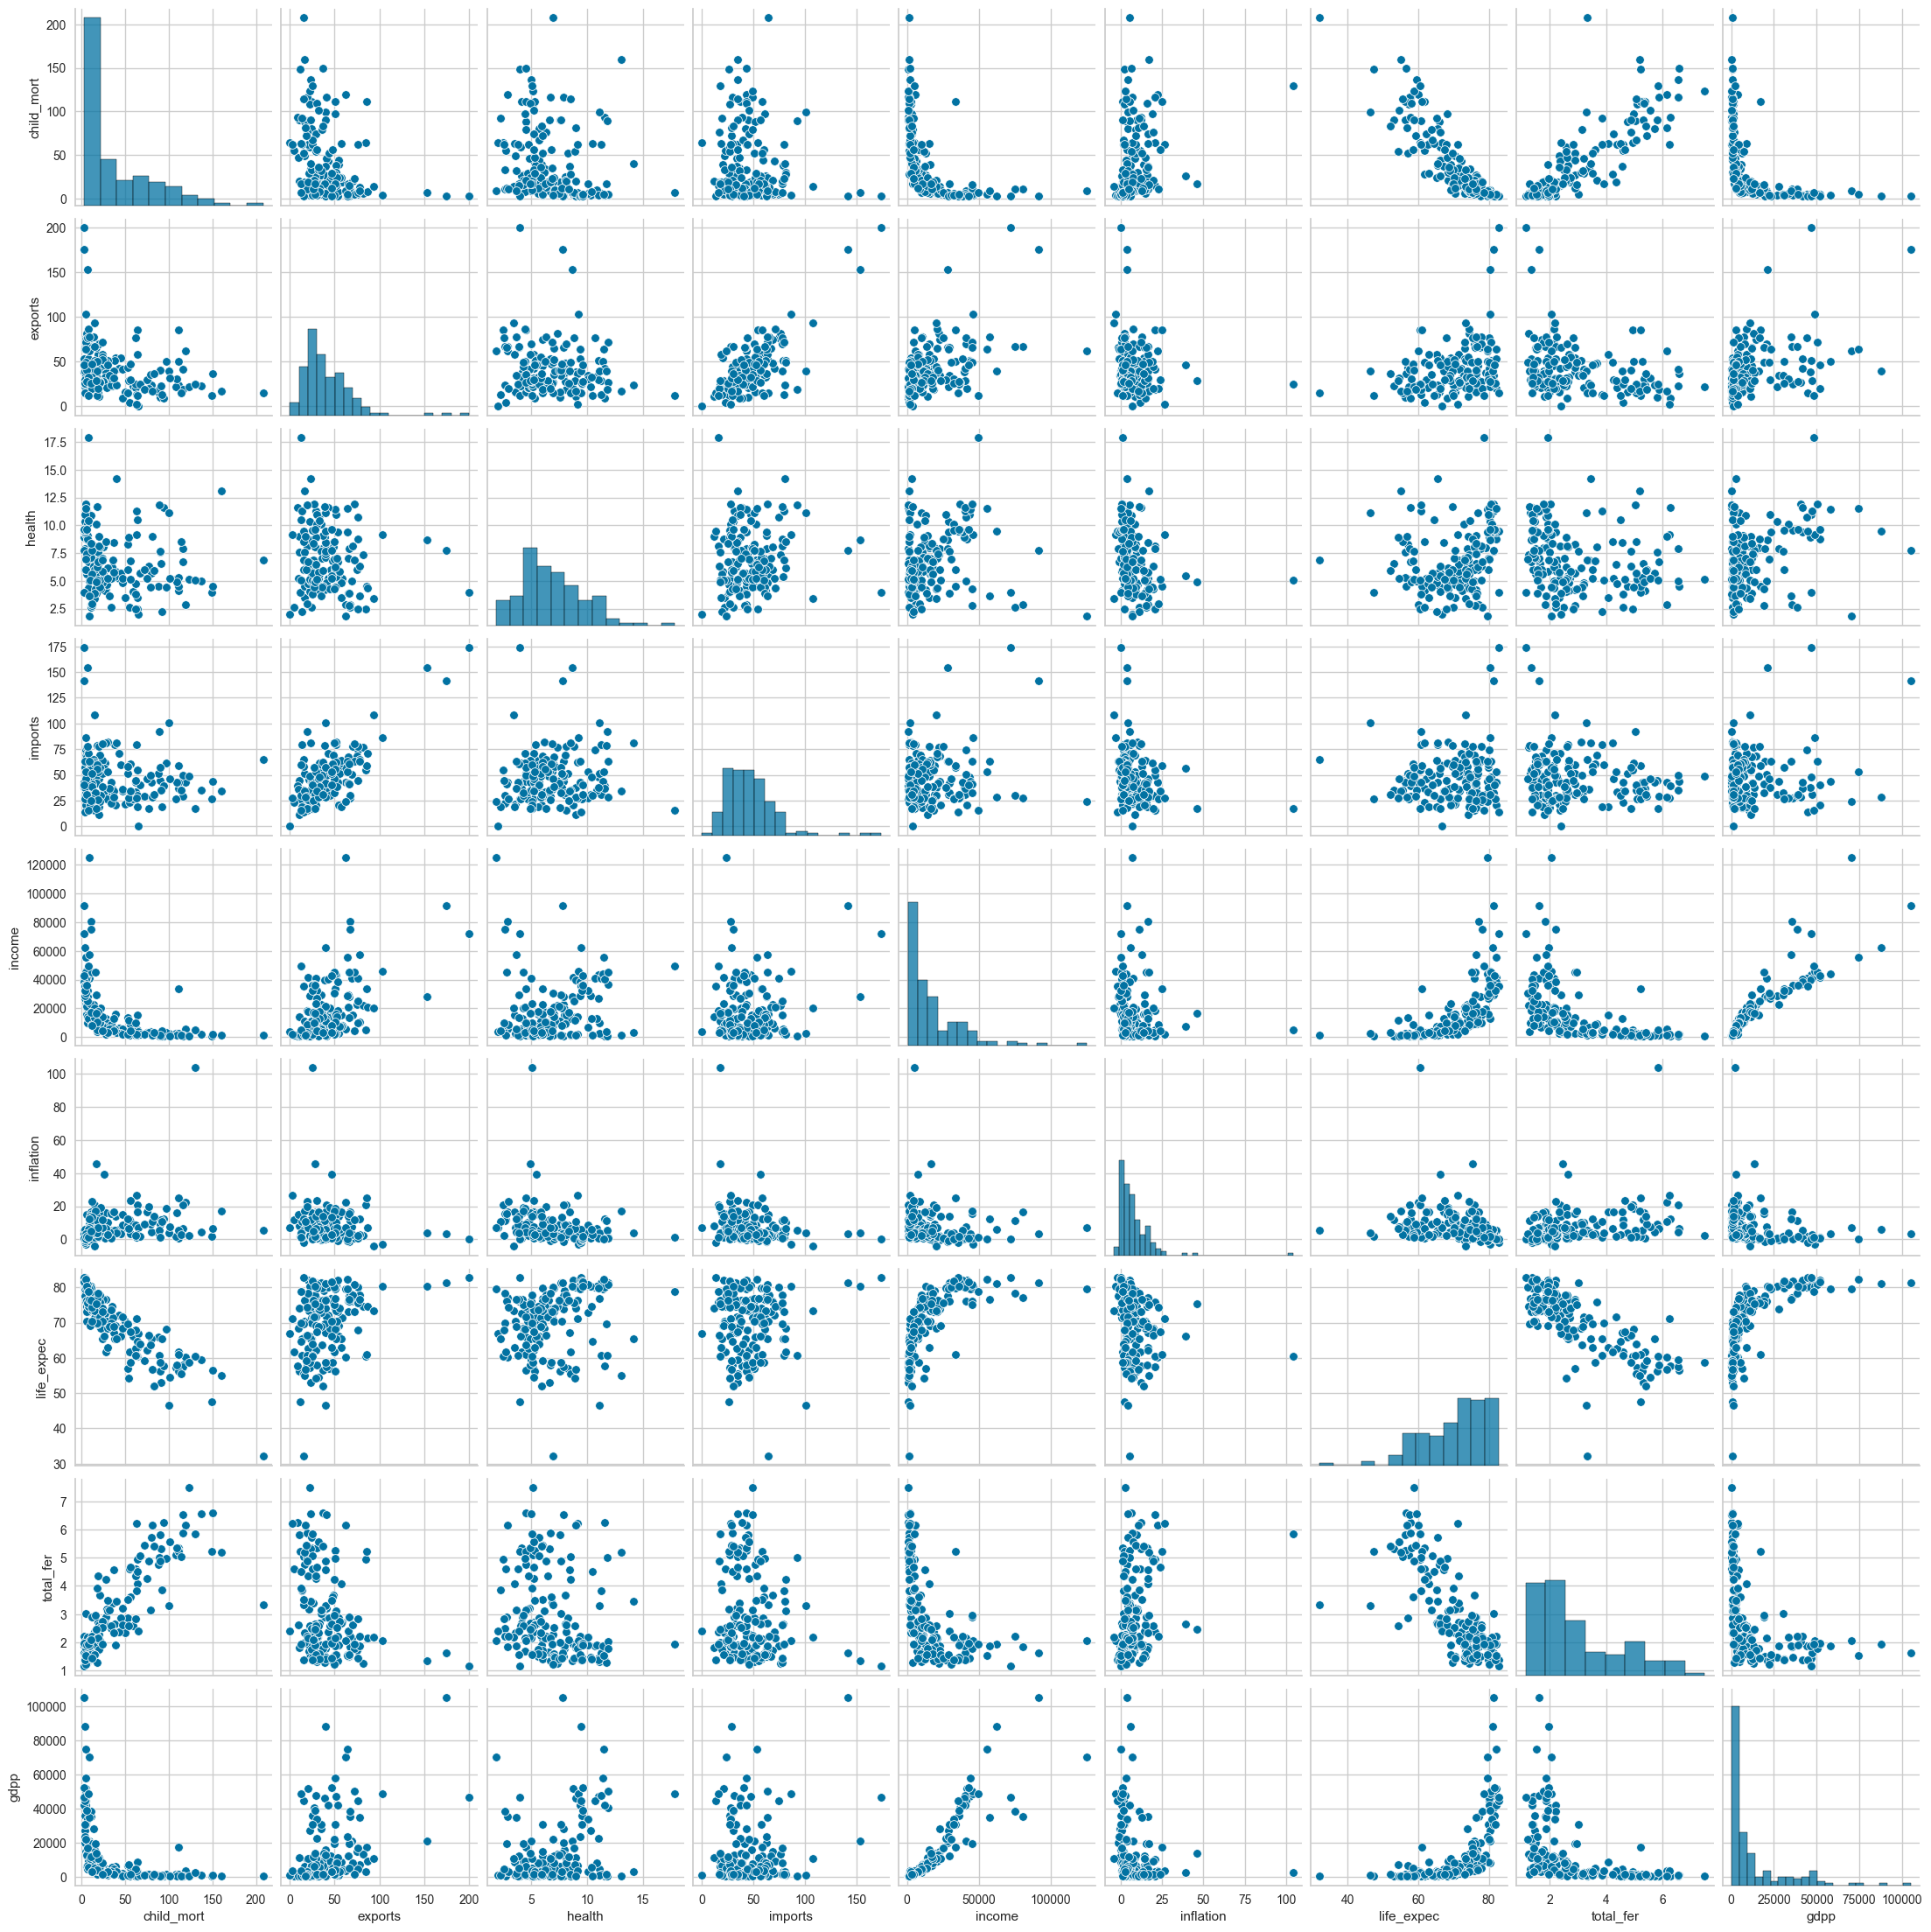

In [9]:
sns.pairplot(data)
plt.show()

### Outliers

In [10]:
# Lets check for null values and outliers

In [11]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
# Check for outliers

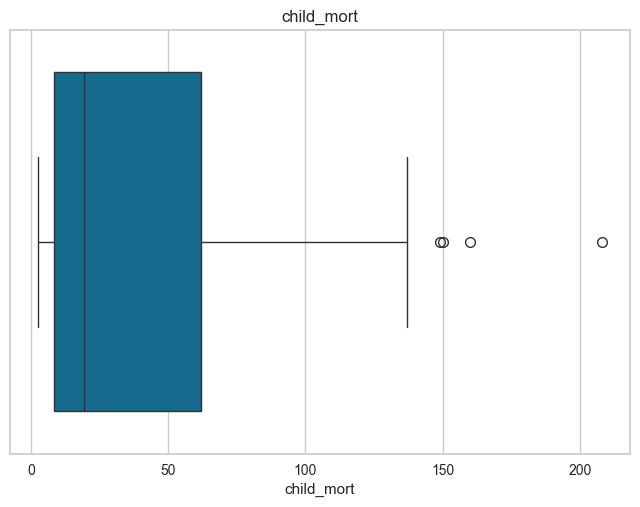

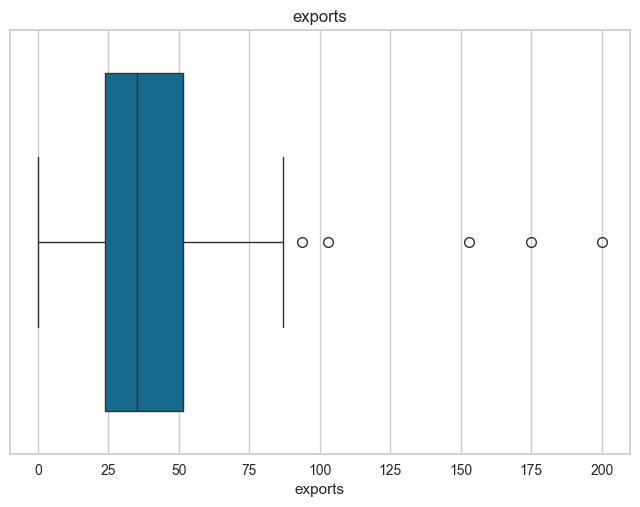

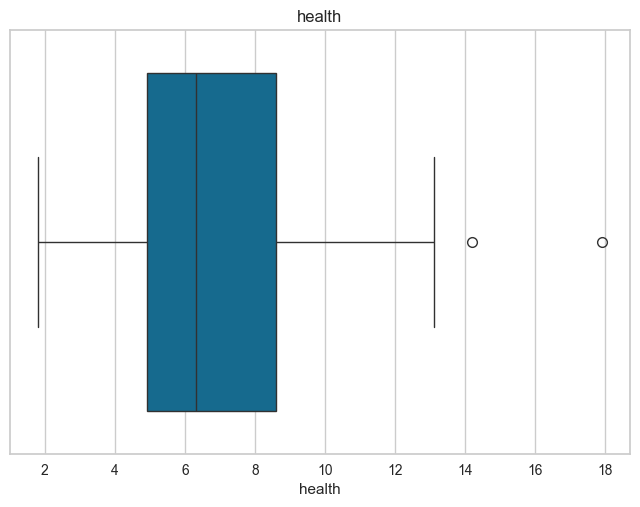

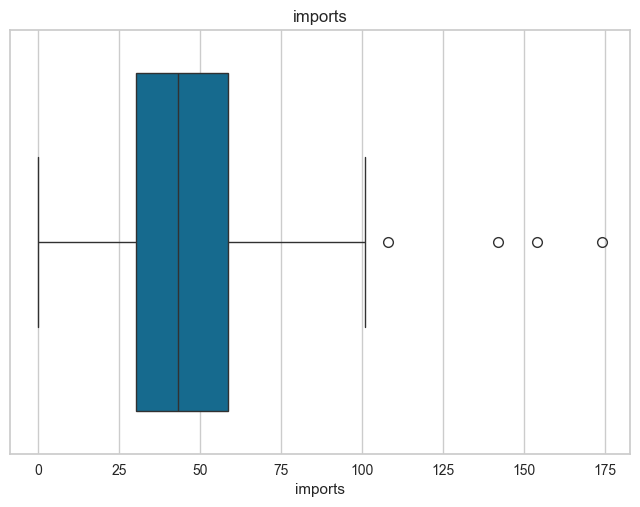

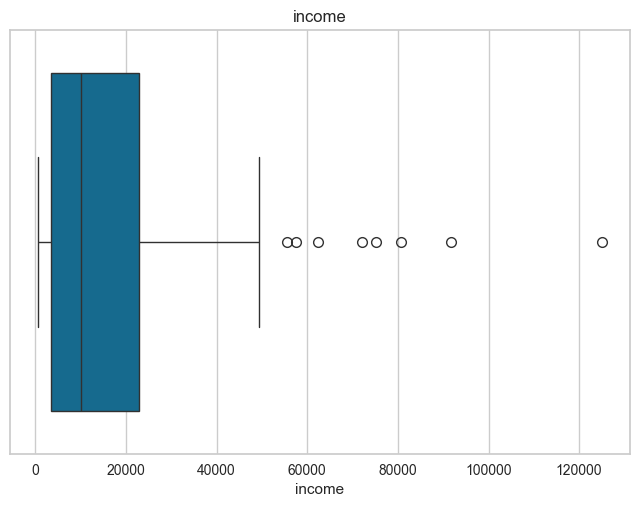

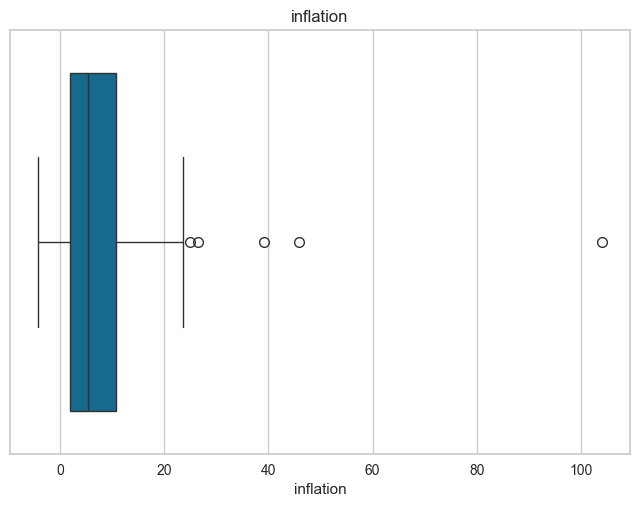

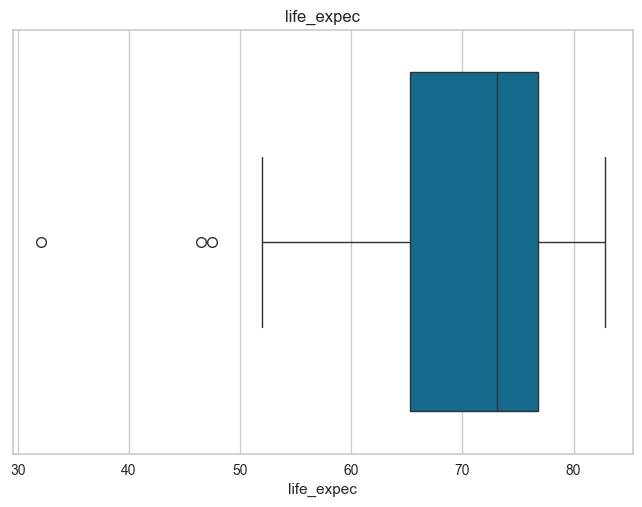

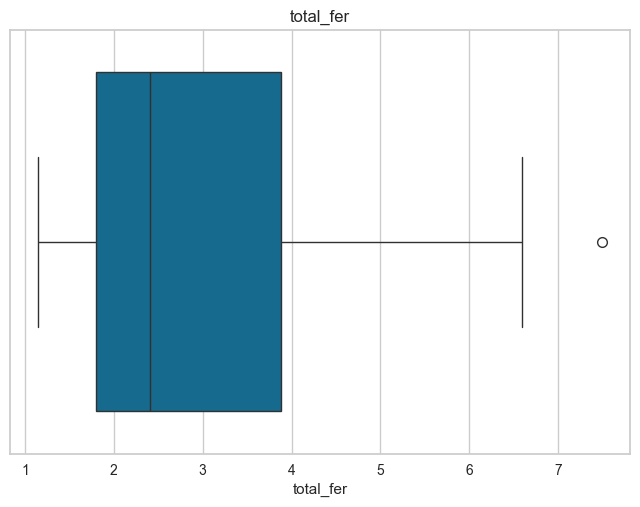

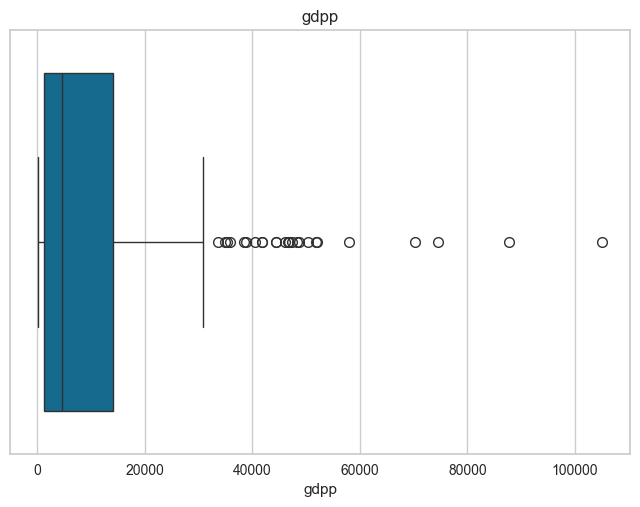

In [13]:
for i in data.columns:
    plt.title(i)
    sns.boxplot(data[i],orient='h')
    plt.show()

In [14]:
# We have extreme outliers in income,inflation and GDP

In [15]:
# Lets use 2.5*IQR and cap these outliers
for i in ['income','gdpp','inflation']:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr= q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = np.where(data[i]>ul,ul,data[i])
    data[i] = np.where(data[i]<ll,ll,data[i])

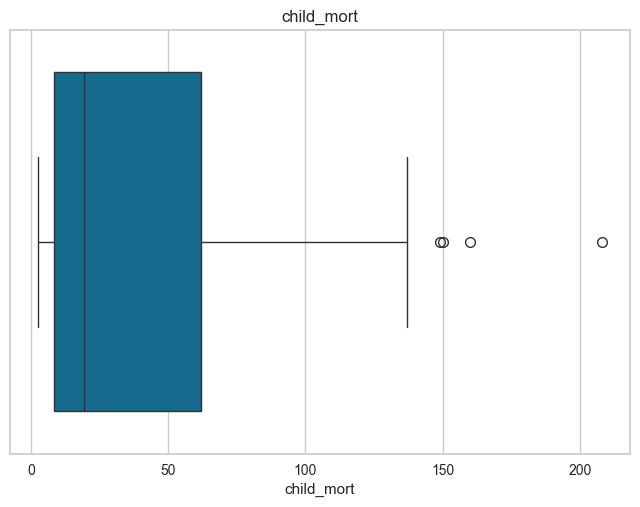

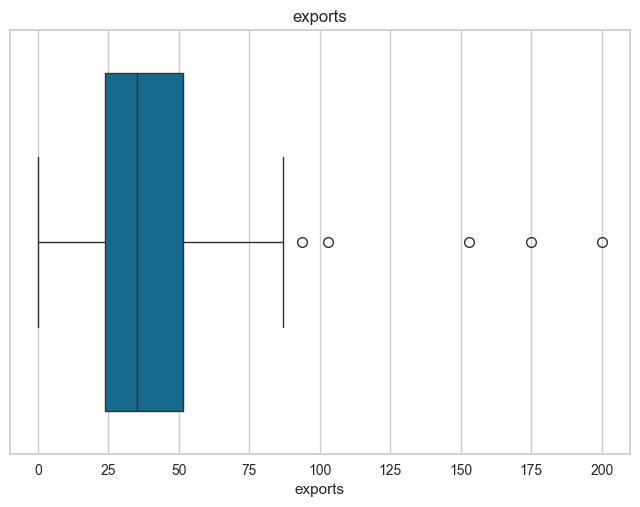

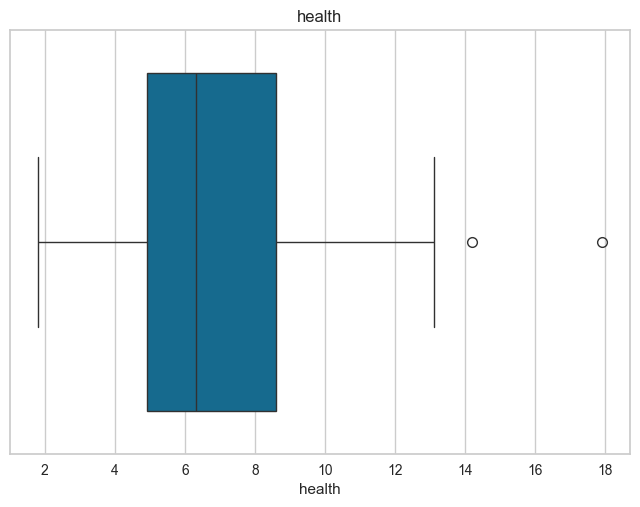

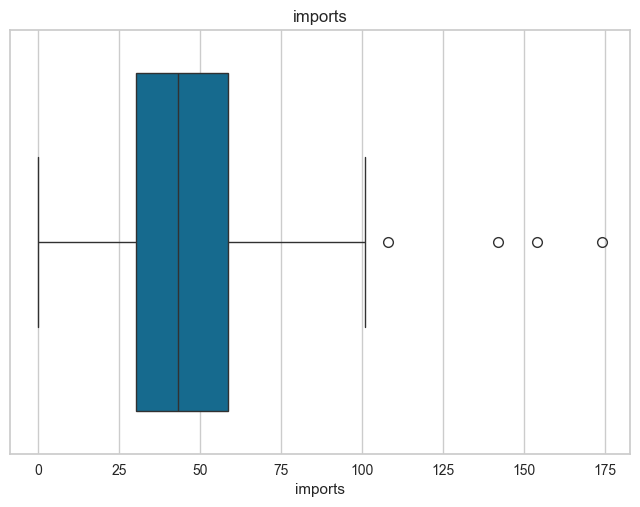

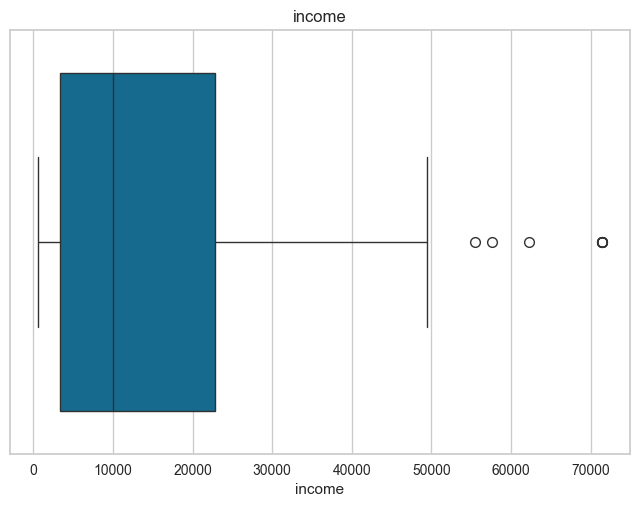

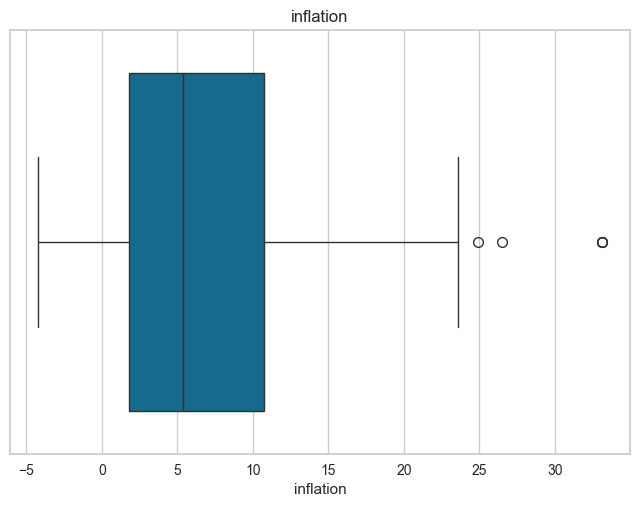

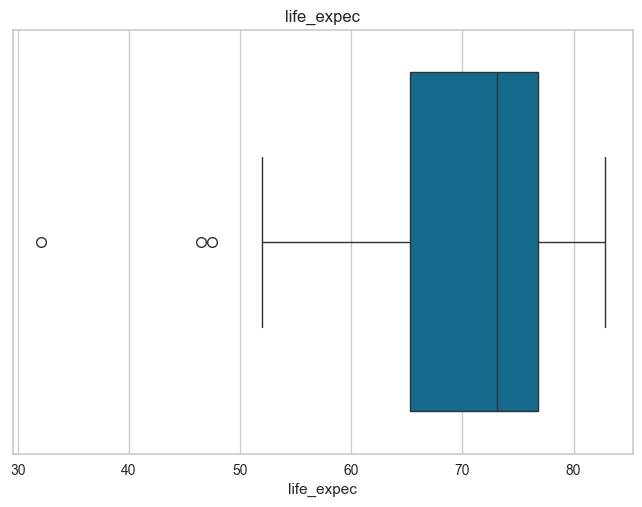

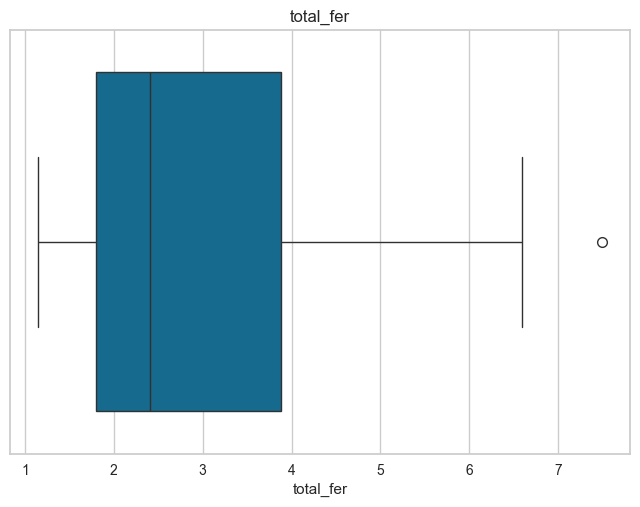

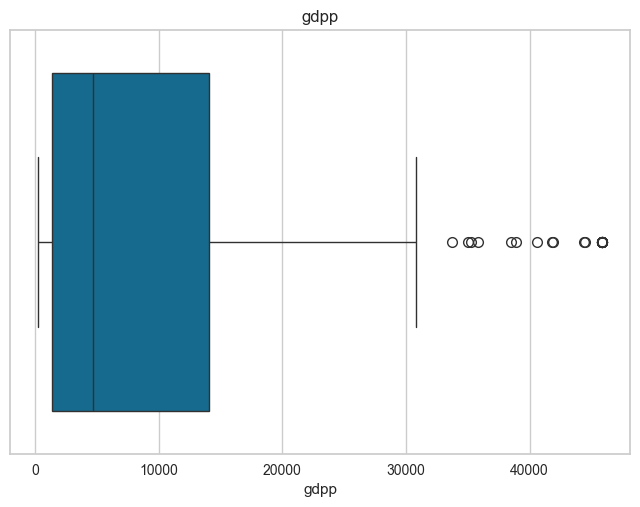

In [16]:
for i in data.columns:
    plt.title(i)
    sns.boxplot(data[i],orient='h')
    plt.show()

### Lets apply PCA on the data to reduce the dimension

In [17]:
data.shape

(167, 9)

In [18]:
pca = PCA(n_components=9)

In [19]:
# Step 1: Standardize

In [20]:
sc = StandardScaler()

In [21]:
data_s = pd.DataFrame(sc.fit_transform(data),columns=data.columns,index=data.index)

In [22]:
data_s.head(3)

child_mort   exports    health   imports    income  inflation  \
country                                                                      
Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.878427   0.303790   
Albania       -0.538949 -0.479658 -0.097016  0.070837 -0.391534  -0.381016   
Algeria       -0.272833 -0.099122 -0.966073 -0.641762 -0.217727   1.225166   

             life_expec  total_fer      gdpp  
country                                       
Afghanistan   -1.619092   1.902882 -0.767399  
Albania        0.647866  -0.859973 -0.526335  
Algeria        0.670423  -0.038404 -0.501118

In [23]:
pca = PCA(n_components=9)

In [24]:
data_pcs = pca.fit_transform(data_s)

In [25]:
data_pca = pd.DataFrame(data_pcs,columns=range(1,10),index = data.index)

In [26]:
data_pca

1         2         3         4         5  \
country                                                                 
Afghanistan         -2.976983 -0.032841 -0.932610  0.789299  0.002730   
Albania              0.420479 -0.456931 -0.080523 -1.318985  0.111028   
Algeria             -0.423936 -0.407533  1.658485 -0.478689  0.389953   
Angola              -3.167254  1.504973  1.630109  1.526512  0.096293   
Antigua and Barbuda  1.116417  0.224792 -0.116042 -0.862830 -0.369262   
...                       ...       ...       ...       ...       ...   
Vanuatu             -0.841494  0.680450 -0.332940 -0.797223 -0.510282   
Venezuela           -0.579641 -1.253703  3.079860  0.484351  1.943542   
Vietnam              0.327842  1.533762  0.231331 -1.004264  1.288335   
Yemen               -2.136859 -0.163968  1.500716  0.450588  1.107161   
Zambia              -2.989555  0.343467  0.158097  0.953086 -0.012743   

                            6         7         8         9  
country                                                      
Afghanistan         -0.262191  0.416696 -0.373026  0.076627  
Albania              0.042683  0.163434  0.273873  0.148639  
Algeria             -0.371683 -0.080897  0.233012  0.057846  
Angola              -0.451189 -0.334483  0.330121 -0.259418  
Antigua and Barbuda -0.235218  0.200057  0.034177  0.089805  
...                       ...       ...       ...       ...  
Vanuatu             -0.009033 -0.122974 -0.685673 -0.291868  
Venezuela            0.110130  0.253283  0.163679 -0.381777  
Vietnam              0.050252 -0.167081  0.262921 -0.163044  
Yemen               -0.489837  0.137117 -0.015546 -0.124555  
Zambia               0.255166 -0.327837 -0.777784 -0.228843  

[167 rows x 9 columns]

In [27]:
# Kasior's Criterion
pca.explained_variance_

array([4.31207333, 1.56974591, 1.19878755, 0.92471919, 0.5956137 ,
       0.22264376, 0.10396867, 0.0834602 , 0.04320456])

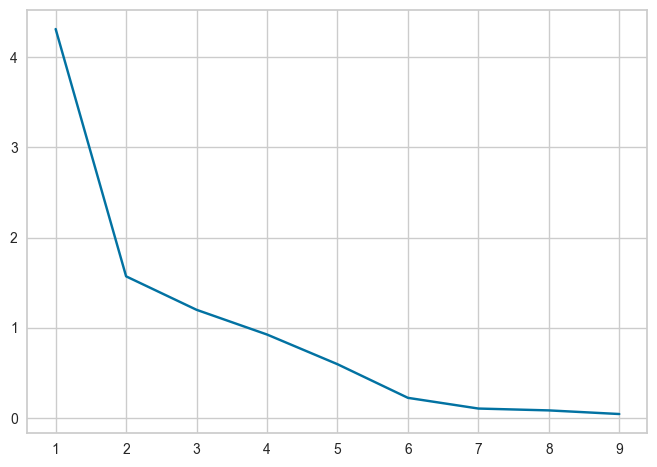

In [28]:
# Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [29]:
# Total explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.47625028, 0.64962209, 0.78202311, 0.88415443, 0.94993745,
       0.97452751, 0.98601041, 0.99522824, 1.        ])

In [30]:
# Lets reduce it to 5-D
pca_final = PCA(n_components=5)

In [31]:
data_pca = pca_final.fit_transform(data_s)

In [32]:
data_pca = pd.DataFrame(data_pca,columns=range(1,6),index = data.index)

In [33]:
data_pca

1         2         3         4         5
country                                                              
Afghanistan         -2.976983 -0.032841 -0.932610  0.789299  0.002730
Albania              0.420479 -0.456931 -0.080523 -1.318985  0.111028
Algeria             -0.423936 -0.407533  1.658485 -0.478689  0.389953
Angola              -3.167254  1.504973  1.630109  1.526512  0.096293
Antigua and Barbuda  1.116417  0.224792 -0.116042 -0.862830 -0.369262
...                       ...       ...       ...       ...       ...
Vanuatu             -0.841494  0.680450 -0.332940 -0.797223 -0.510282
Venezuela           -0.579641 -1.253703  3.079860  0.484351  1.943542
Vietnam              0.327842  1.533762  0.231331 -1.004264  1.288335
Yemen               -2.136859 -0.163968  1.500716  0.450588  1.107161
Zambia              -2.989555  0.343467  0.158097  0.953086 -0.012743

[167 rows x 5 columns]

In [34]:
np.sum(pca_final.explained_variance_ratio_)

0.9499374499138871

## K Means Clustering

In [35]:
# Lets make an elbow plot

In [36]:
k_elbow = KElbowVisualizer(KMeans(),k=10)

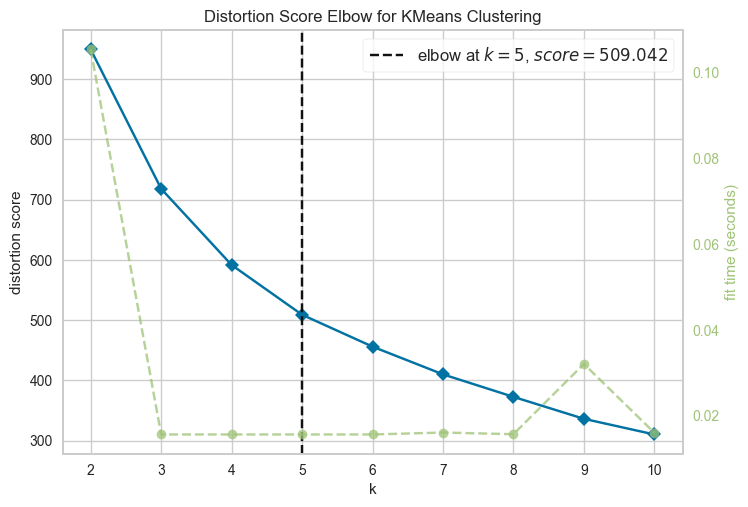

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
k_elbow.fit(data_pca)
k_elbow.show()

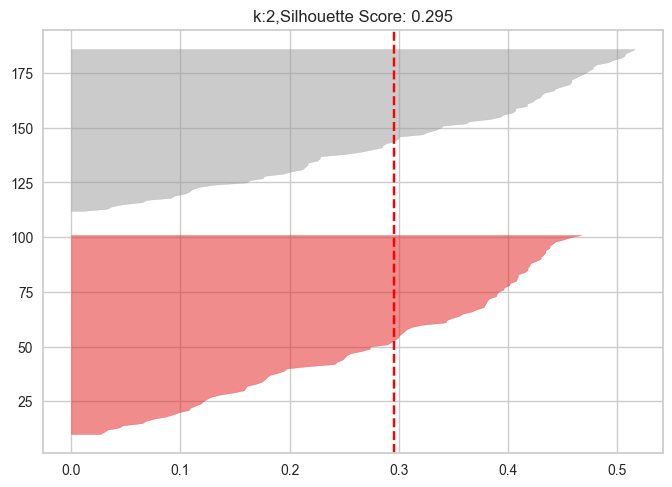

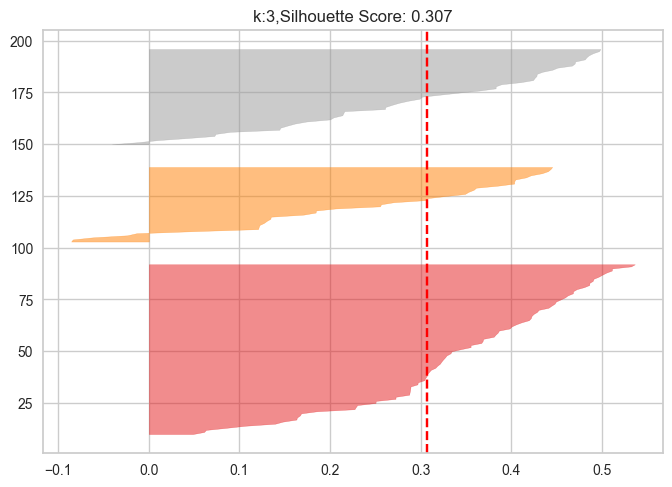

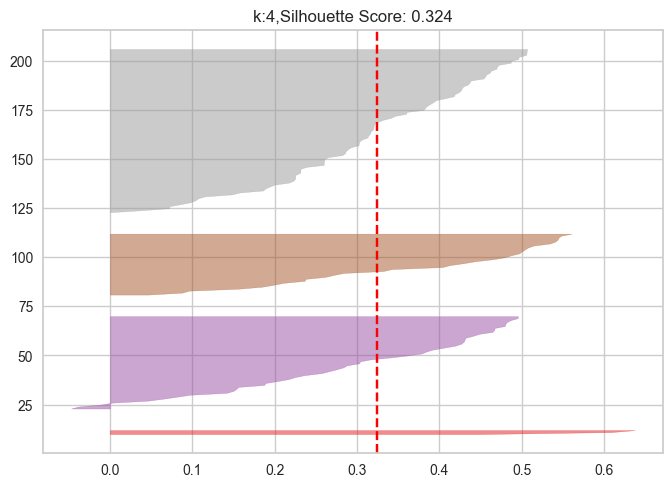

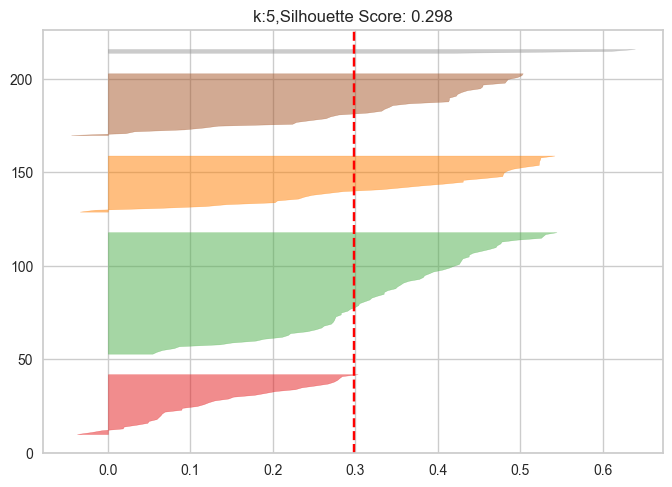

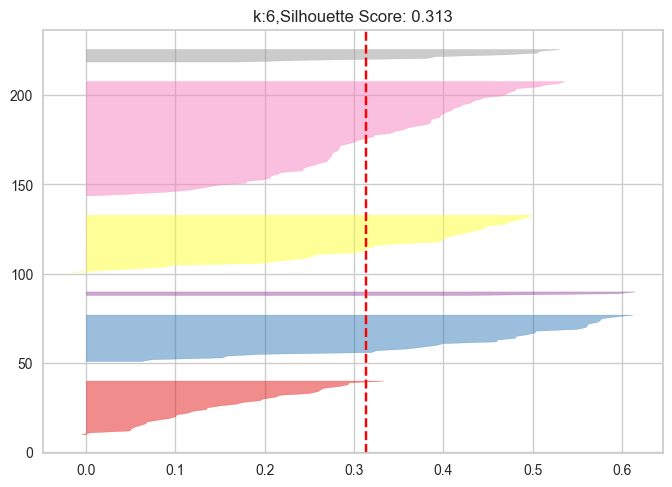

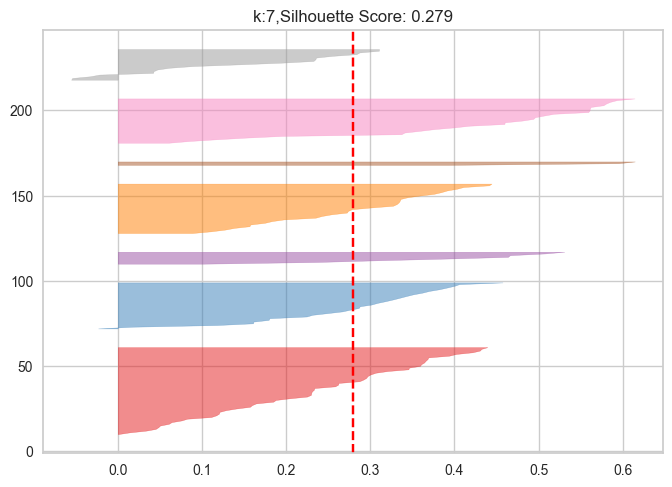

In [38]:
for i in range(2,8):
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f'k:{i},Silhouette Score: {round(sil_viz.silhouette_score_,3)}')
    plt.show()

Inference: If k>=4, we can see some very small clusters are forming. Hence we should go either with 2 or 3 clusters. If we go with 2 clusters there are no outliers, while the 3 clusters although silhoutte score increases but we have few outliers.

In [39]:
# Lets go with k=3

In [39]:
final_kmean = KMeans(n_clusters=3)

In [40]:
kmean_pred = final_kmean.fit_predict(data_pca)

In [41]:
kmean_pred

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

## Business Interpretations

In [42]:
data['Kmean_label'] = kmean_pred

In [43]:
data['Kmean_label'].value_counts()

Kmean_label
0    83
2    47
1    37
Name: count, dtype: int64

In [44]:
data

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      33.10   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp  Kmean_label  
country                                                           
Afghanistan                56.2       5.82    553.0            2  
Albania                    76.3       1.65   4090.0            0  
Algeria                    76.5       2.89   4460.0            0  
Angola                     60.1       6.16   3530.0            2  
Antigua and Barbuda        76.8       2.13  12200.0            0  
...                         ...        ...      ...          ...  
Vanuatu                    63.0       3.50   2970.0            0  
Venezuela                  75.4       2.47  13500.0            0  
Vietnam                    73.1       1.95   1310.0            0  
Yemen                      67.5       4.67   1310.0            2  
Zambia                     52.0       5.40   1460.0            2  

[167 rows x 10 columns]

In [45]:
data.groupby(by='Kmean_label').mean()

child_mort    exports    health    imports        income  \
Kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1              5.237838  58.097297  8.782973  51.281081  42690.878378   
2             92.961702  29.151277  6.388511  42.323404   3942.404255   

             inflation  life_expec  total_fer          gdpp  
Kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1             2.588432   79.956757   1.755676  36905.405405  
2            10.511170   59.187234   5.008085   1922.382979

In [46]:
silhouette_score(data_pca,kmean_pred)

0.306797705128332

In [47]:
# Visualize these clusters

In [48]:
centroids = final_kmean.cluster_centers_

In [49]:
centroids[1][0]

2.854883997346908

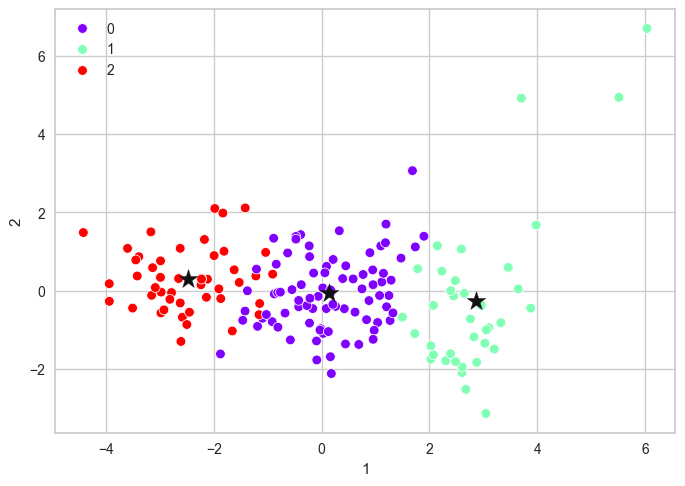

In [51]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=kmean_pred,palette='rainbow')
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], marker='*', s=200, color='k')

plt.show()

### Aggloromative Clustering

In [52]:
# Distance Matrix

dist_matrix = euclidean_distances(data_pca)


In [53]:
dist_matrix.shape

(167, 167)

In [54]:
link_matrix = linkage(dist_matrix,method='ward')

In [55]:
link_matrix[:10,:]

array([[ 41.        , 121.        ,   1.32413918,   2.        ],
       [ 50.        , 116.        ,   1.43949751,   2.        ],
       [ 34.        , 119.        ,   1.72602078,   2.        ],
       [  8.        ,  44.        ,   1.72608538,   2.        ],
       [ 75.        , 158.        ,   1.76310541,   2.        ],
       [ 17.        ,  28.        ,   1.97336634,   2.        ],
       [  4.        ,  24.        ,   2.16534337,   2.        ],
       [ 18.        ,  52.        ,   2.18147315,   2.        ],
       [ 48.        ,  61.        ,   2.20130579,   2.        ],
       [ 63.        , 166.        ,   2.23603046,   2.        ]])

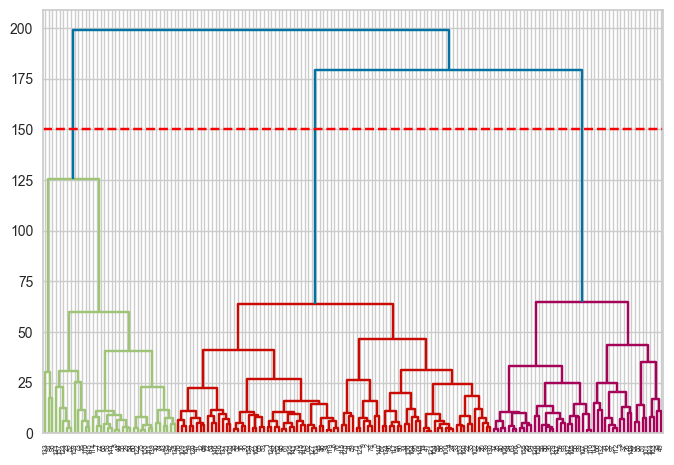

In [56]:
dendrogram(link_matrix)
plt.axhline(y=150,color='red',ls='--')
plt.show()

In [57]:
# Lets take k=3

In [58]:
final_agglo = AgglomerativeClustering(n_clusters=3)

In [59]:
agglo_pred = final_agglo.fit_predict(data_pca)

In [60]:
silhouette_score(data_pca,agglo_pred)

0.2598001326809029

<Axes: xlabel='1', ylabel='2'>

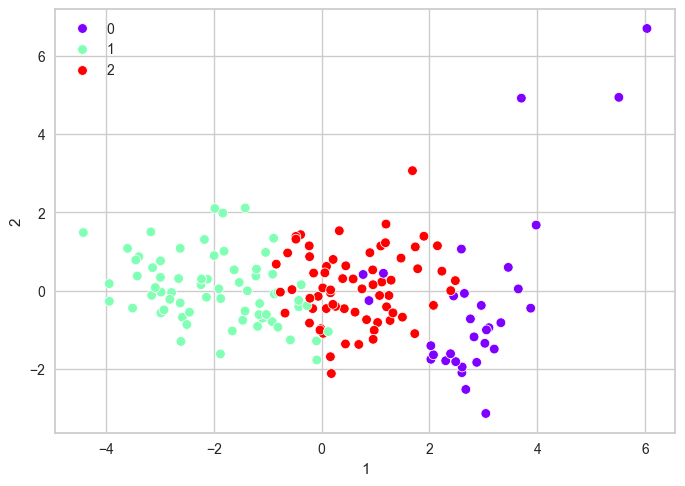

In [61]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=agglo_pred,palette='rainbow')

Inference: Since Kmeans has better silhouette score which can also be seen 
scatterplot(Aggloromative clustering has more overlapping datapoints).We can  go with Kmeans Clustering with k=3 as final model.

In [62]:
data.groupby(by='Kmean_label').mean()

child_mort    exports    health    imports        income  \
Kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1              5.237838  58.097297  8.782973  51.281081  42690.878378   
2             92.961702  29.151277  6.388511  42.323404   3942.404255   

             inflation  life_expec  total_fer          gdpp  
Kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1             2.588432   79.956757   1.755676  36905.405405  
2            10.511170   59.187234   5.008085   1922.382979

In [63]:
data['Kmean_label'] = data['Kmean_label'].map({0:'Developing',
                       1:'Developed',
                       2:'Underdevelop'})

In [64]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp   Kmean_label  
country                                                   
Afghanistan        56.2       5.82   553.0  Underdevelop  
Albania            76.3       1.65  4090.0    Developing  
Algeria            76.5       2.89  4460.0    Developing

In [65]:
# Developed
for i in data[data['Kmean_label']=='Developed'].index:
    print(i,end=', ')

Australia, Austria, Bahamas, Bahrain, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Malta, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Slovak Republic, Slovenia, South Korea, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, 

In [70]:
# Developing
for i in data[data['Kmean_label']=='Developing'].index:
    print(i,end=', ')

Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam, 

In [71]:
for i in data[data['Kmean_label']=='Underdevelop'].index:
    print(i,end=', ')

Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia, 

## World Map

In [67]:
import plotly.express as px

In [68]:
df = pd.DataFrame({'country':data.index,'label':data['Kmean_label']})

In [69]:
fig = px.choropleth(df,locationmode='country names',locations='country',color=df['label'],
                    color_discrete_map={'Developed':'green','Developing':'blue','Underdevelop':'red'})
fig.show()